Calculate the NSE from IES results

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import spotpy as sp

In [6]:
fn = '126001A_ies.csv'
ies_outputs = pd.read_csv(fn, index_col = 'real_name')

In [7]:
obs_annual = [52093.389, 99477.940, 44063.700, 57936.470, 53449.050, 21858.007, 38560.992, 51843.258, 14176.304]
pbias = ies_outputs.loc[:, 'din_pbias'].values
annual_ies = ies_outputs.loc[:, 'din_2009':'din_2017'].values

In [10]:
nse = []
for ii in range(annual_ies.shape[0]):
    nse.append(sp.objectivefunctions.nashsutcliffe(obs_annual, annual_ies[ii]))

In [12]:
ies_outputs['NSE'] = nse
ies_outputs.to_csv(fn)

C:\Users\qianw\anaconda3\envs\oed\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


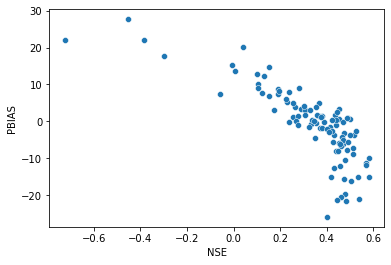

In [13]:
ax = sns.scatterplot(nse, pbias)
ax.set_xlabel('NSE')
ax.set_ylabel('PBIAS')
plt.savefig('NSE_PBIAS.pdf', format='pdf', dpi=300)